# Исследование успешности компьютерных игр

Заказчик - интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Данные за 2016 год могут быть неполными.

**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Знакомство с данными

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Выводы**

Предварительно можно утверждать, что данных достаточно для выявления закономерностей. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

### Стиль заголовков

Приведем названия колонок к хорошему стилю

In [5]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
data.columns = [name.lower() for name in data.columns]

### Обработка пропусков

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

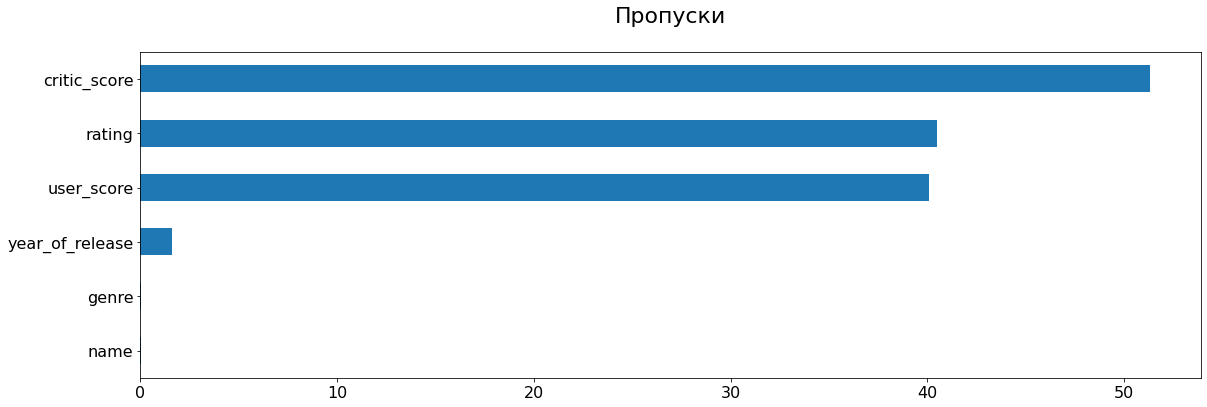

In [8]:
((data.isna().mean() * 100).to_frame() # строим таблицу с процентами пропусков данных по столбцам
 .rename(columns = {0:'space'})
 .query('space > 0') # оставляем только те столбцы, где есть пропуски
 .sort_values('space')
 .plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16) # визуализируем полученную таблицу
 .set_title('Пропуски' + "\n", fontsize = 22)    
);

В столбцах `genre`, `name` и `year_of_release` число пропусков составляет менее 2 процентов, поэтому можно удалить эти строки.

В столбце `critic_score` число пропусков превышает половину. На таком количестве данных вряд ли получится построить адекватные выводы, но и заполнить их усредненным значением - не выход.  В столбце `user_score` также достаточно много пропусков. Однако заполнить их медианой или средним значением, на мой взгляд, будет неккоректно. Пропуски могут быть в играх, чей релиз состоялся совсем недавно (их просто еще не успели оценить), а также могла произойти ошибка при составлении таблицы.

Об успешности игры говорит ее высокий рейтинг и большое число продаж. Если же мы заполним пропуски усредненным значение, это может исказить результаты исследования, и успешность игры будет определена неправильно.

В столбце `rating` также достаточно много пропусков. Так как игр без возрастного рейтинга не бывает, то либо он еще не установлен, либо произошли проблемы при выгрузке и/или сборе данных. На мой вгляд, такие пропуски можно заполнить значением "RP", что означает, что рейтинг еще не установлен. 

In [9]:
data = data.dropna(subset=['name','genre','year_of_release']).reset_index(drop=True)

In [10]:
data['rating'] = data['rating'].fillna('RP')

In [11]:
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Среди оценок пользователей выделяется оценка tbd, расшифровывается как To Be Determined, то есть "Будет определено". Скорее всего такие оценки у игр либо чей релиз состоялся этом году, либо только были анонсированы. Думаю, такие значения можно заменить на пропуски, что по сути то же самое, однако упростит работу с другими значениями столбца.

In [12]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.NaN

### Изменение типов данных

Для дальнейшего удобства поменяем тип данных в некоторых столбцах:
- в `year_of_release` на целочисленный
- в `user_score` на вещественный

In [13]:
data['year_of_release'] = data['year_of_release'].astype('int')

data['user_score'] = data['user_score'].astype('float')

### Добавление данных

Для каждой игры добавим столбец с числом продаж по миру.

In [14]:
data['world_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  world_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.4+ MB


**Выводы**

Предаброботка обнаружила слелующие проблемы в данных:

- нарушения в стиле заголовков
- пропущенные значения
- неудобный для исследования тип данных

Названия заголовков были исправлены для упрощения работы с таблицей.

Пропуски были обработаны. Неоторые значения были удалены, некоторые восполнены, однако в столбцах с оценками пользователей и критиков все еще достаточно много пропусков.

Типы данных были приведены в удобные для исследования.

## Исследовательский анализ

### Поиск актуального периода

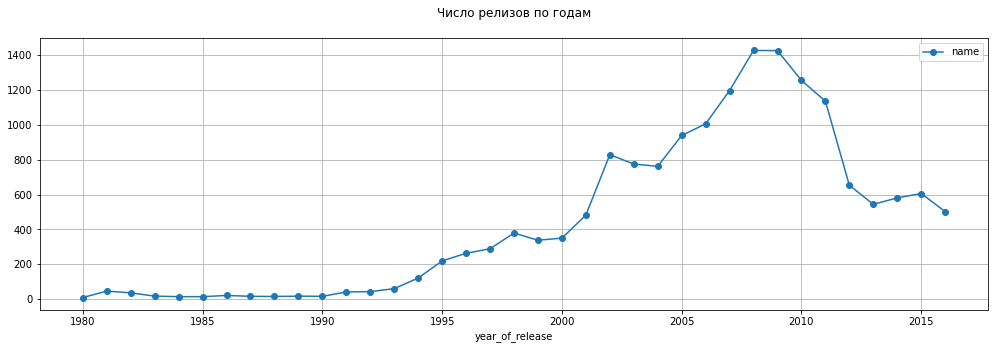

In [16]:
(
    data
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(style='o-', figsize=(17,5), grid=True, title='Число релизов по годам' + '\n')
);

Из графика видно, что число релизов игр в прошлом веке сильно уступает нынешнему. 

In [17]:
# Получаем топ-10 платформ по продажам
top_10 = (
    data.groupby('platform')
    .agg(money=('world_sales', 'sum'))
    .sort_values(by='money', ascending=False)
    .head(10)
)

top_10

,money
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


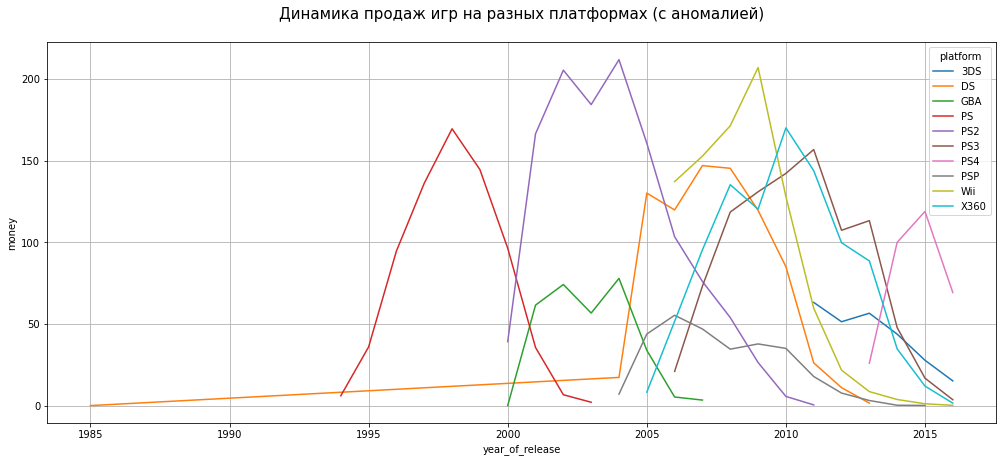

In [18]:
top_10_platforms = top_10.index

# Создаем таблицу для графика
data_best_platforms = (
    data.query('platform in @top_10_platforms')
    .groupby(['platform', 'year_of_release'])
    .agg(money=('world_sales', 'sum'))
)

# Смотрим динамику развития топ-10 платформ сквозь года
fig, ax = plt.subplots(figsize=(17, 7))
ax.grid()
ax.set_title('Динамика продаж игр на разных платформах (с аномалией)' + '\n', fontsize = 15)
sns.lineplot(data=data_best_platforms, x='year_of_release', y='money', hue='platform', ax=ax);
plt.show()

Первым делом в глаза бросается аномалия в данных: у платформы, появившейся в 2004 году имеются продажи в 1985 году. Вероятно, при составлении таблицы год релиза указали не тот.

In [19]:
data.query('platform == "DS" and year_of_release < 2004')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,RP,0.02


Запись всего одна, а данных в ней почти нет, поэтому можно смело удалить данную строку. На исследование это не повлияет.

In [20]:
data = data.drop(data.index[[15704]])

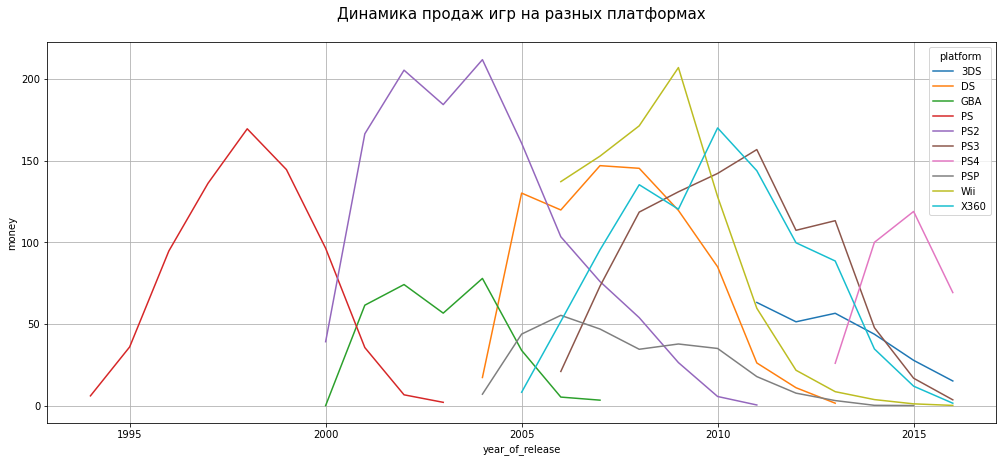

In [21]:
data_best_platforms = (
    data.query('platform in @top_10_platforms')
    .groupby(['platform', 'year_of_release'])
    .agg(money=('world_sales', 'sum'))
)

fig, ax = plt.subplots(figsize=(17, 7))
ax.grid()
ax.set_title('Динамика продаж игр на разных платформах' + '\n', fontsize = 15)
sns.lineplot(data=data_best_platforms, x='year_of_release', y='money', hue='platform', ax=ax);
plt.show()

Теперь из графика четко видно, что в среднем платформы существуют по 5-10 лет. В основном это связано с тем, что у компании появляется более новая и усовершенствованная версия платформы.

Проанализировав самые большие платформы и общее число релизов по годам, можно сделать вывод, что для корректного прогназирования популярных игр в 2017 году нам будет достаточно данных за последние 10 лет.

In [22]:
actual_data = data.query('year_of_release >= 2006')

###  Анализ актуальных данных

In [23]:
# Создаем таблицу для графика
data_actual_platforms = (
    actual_data
    .groupby(['platform', 'year_of_release'])
    .agg(money=('world_sales', 'sum'))
)

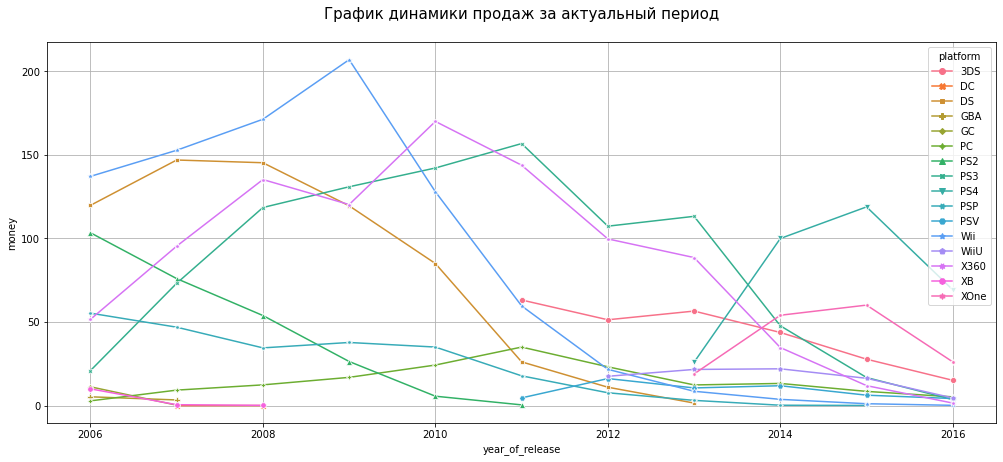

In [24]:
# Смотрим динамику продаж на платформах
fig, ax = plt.subplots(figsize=(17, 7))
ax.grid()
ax.set_title('График динамики продаж за актуальный период' + '\n', fontsize = 15)
sns.lineplot(data=data_actual_platforms, ax=ax,
             x='year_of_release', y='money',
             hue='platform', style='platform', markers=True, dashes=False);
plt.show()

Почти у всех платформ к 2016 году по сравнению с предыдущим заметен спад, что скорее всего связано с неполнотой данных (например, игра только вышла в декабре и данные о ее продажах еще не успели посчитать). Поэтому будем смотреть общую динамику графиков без учета этого падения.

Среди платформ к 2016 году заметен рост продаж у PS4, XOne. Учитывая, что данные платформы появились лишь в 2013 году и более современных альтернатив у их компаний не появилось, полагаю, что этот рост будет продолжаться еще какое-то время.

У платформы WiiU, PC и PSV достаточно стабильные в последнее время, но не очень высокие показатели.
У 3DS продажи падают.
Остальные платформы либо прекратили продажи, либо имеют очень низкие показатели, без особых перспектив.

In [25]:
potential_platforms = ['PS4', 'XOne', 'WiiU', 'PC', 'PSV']
actual_data_with_pp = actual_data.query('platform in @potential_platforms')

Посмотрим на разброс сборов по миру за игры в потенциальных платформах.

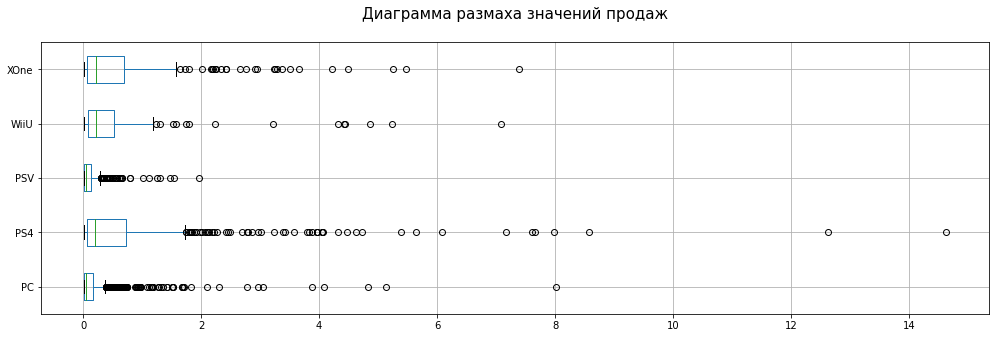

In [26]:
fig, ax = plt.subplots(figsize = (17,5))
ax = (
    actual_data_with_pp
    .pivot_table(index='name', columns='platform', values='world_sales', aggfunc='sum')
    .boxplot(figsize=(15,5), vert=False)
)
ax.set_title('Диаграмма размаха значений продаж' + '\n', fontsize = 15);

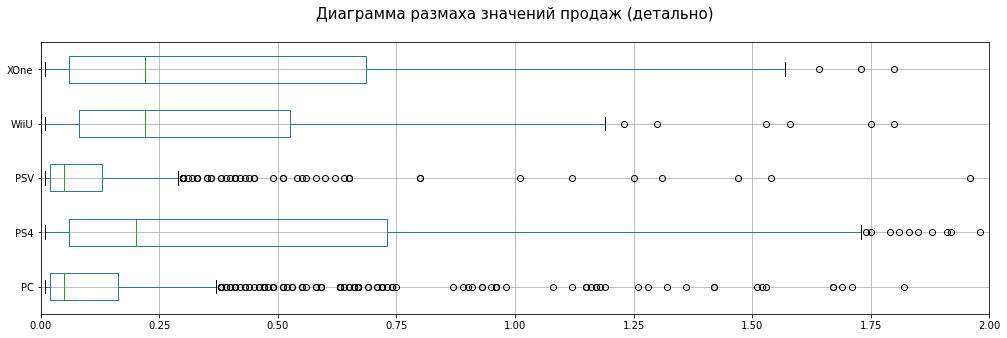

In [27]:
fig, ax = plt.subplots(figsize = (17,5))
ax = (
    actual_data_with_pp
    .pivot_table(index='name', columns='platform', values='world_sales', aggfunc='sum')
    .boxplot(figsize=(15,5), vert=False)
)
ax.set_title('Диаграмма размаха значений продаж (детально)' + '\n', fontsize = 15)
ax.set_xlim(0, 2);

Сразу можно сказать, что все данные имеют скошенное распредление. Из построенных графиков видно, что медианные значения на платформах XOne, WiiU и PS4 очень близки, однако имеют разный размах 75 квантиля. Самые большие выбросы по сборам находятся на платформе плейстейшн 4. Самые маленькие значения как среди медиан, так и среди аномалий у PSV.

 ### Зависят ли продажи от отзовывов?

In [28]:
data_ps4 = actual_data.query('platform == "PS4"')
data_ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,RP,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16230,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,RP,0.01
16233,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16255,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16259,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


Сначала посмотрим, влияют ли отзывы критиков на продаваемость игр на платформе.

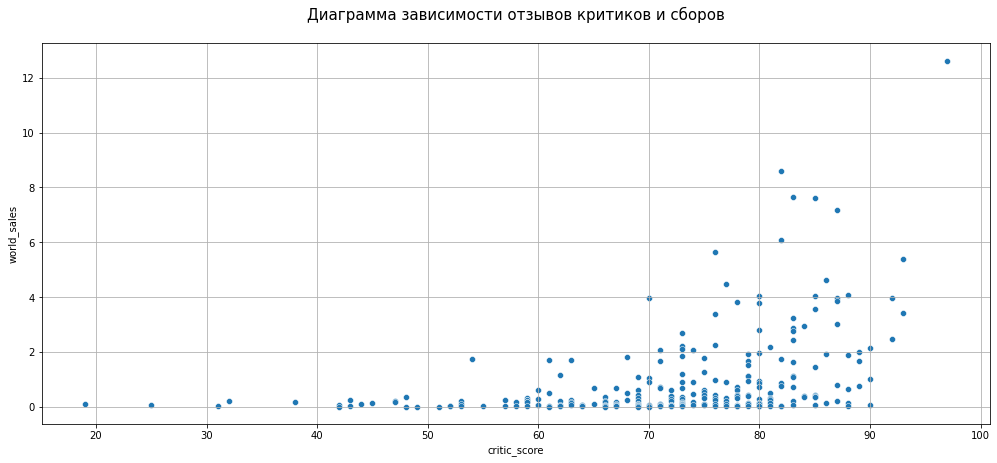

In [29]:
fig, ax = plt.subplots(figsize=(17, 7))
ax.grid()
ax.set_title('Диаграмма зависимости отзывов критиков и сборов' + '\n', fontsize = 15)
sns.scatterplot(data=data_ps4, x='critic_score', y='world_sales');
plt.show()

In [30]:
data_ps4['critic_score'].corr(data_ps4['world_sales'])

0.40656790206178095

На перый вгляд, кажется, что зависимость есть. Игры с оценкой от критиков хорошо и отлично продаются гораздо чаще и приносят больше сборов, нежели игры с низкими оценками. Однако коэффициент Пирсона очень низкий, значит зависимость не прямая. 

Теперь проверим, существует ли зависимость между оценками самими игроками и общими сборами.

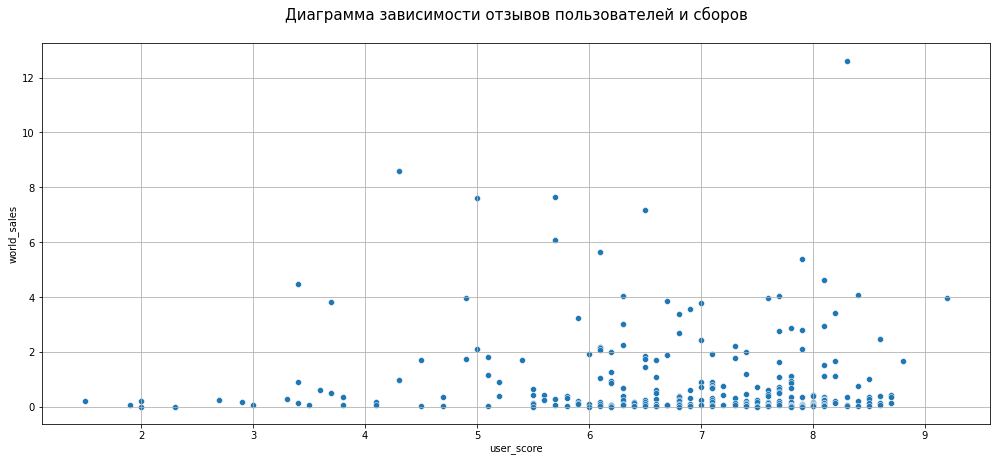

In [31]:
fig, ax = plt.subplots(figsize=(17, 7))
ax.grid()
ax.set_title('Диаграмма зависимости отзывов пользователей и сборов' + '\n', fontsize = 15)
sns.scatterplot(data=data_ps4, x='user_score', y='world_sales');
plt.show()

In [32]:
data_ps4['user_score'].corr(data_ps4['world_sales'])

-0.031957110204556424

Тут с корреляцией все совсем плохо. Ее не просто нет (значение почти 0), но и к тому же отрицательная.

Интересно отметить, что хоть и измерение оценок у пользователей и критиков разные, видна общая тенденция выставлять неплохие оценки (от 6 до 9 для пользователей и, что анологично, от 60 до 90 для критиков). Очень редки случаи когда игре ставят оценку выше 9 (90). Также редки случаи плохой оценки.

**Вывод**

Оценки пользователей никак не влияют на сборы. В основном оценки сосредоточены между 6 и 9.

Оценки критиков плохо коллерируют со сборами от продаж, однако, на мой взгляд, заметна тенденция к росту прибыли при более высоких оценках.

Рассмотрим, как в целом обстоит корреляция у отзывов и сборами,без привязки к платформе.

In [33]:
print("У отзывов критиков и общими продажами среди актуальных для анализа данных корреляция составляет",
      actual_data['critic_score'].corr(actual_data['world_sales']))
print()
print("У отзывов пользователей и общими продажами среди актуальных для анализа данных корреляция составляет",
      actual_data['user_score'].corr(actual_data['world_sales']))

У отзывов критиков и общими продажами среди актуальных для анализа данных корреляция составляет 0.23671025003954382

У отзывов пользователей и общими продажами среди актуальных для анализа данных корреляция составляет 0.0809063898061351


In [34]:
print("У отзывов критиков и общими продажами среди потенциальных платформ корреляция составляет",
      actual_data_with_pp['critic_score'].corr(actual_data['world_sales']))
print()
print("У отзывов пользователей и общими продажами среди потенциальных платформ корреляция составляет",
      actual_data_with_pp['user_score'].corr(actual_data['world_sales']))

У отзывов критиков и общими продажами среди потенциальных платформ корреляция составляет 0.2921106281347635

У отзывов пользователей и общими продажами среди потенциальных платформ корреляция составляет -0.0110782949178644


Результаты корреляции не сильно изменились в зависимости от наборов данных. Тем самым подтвердив независимость сборов от отзывов.

### Как зависят продажи от жанра игры

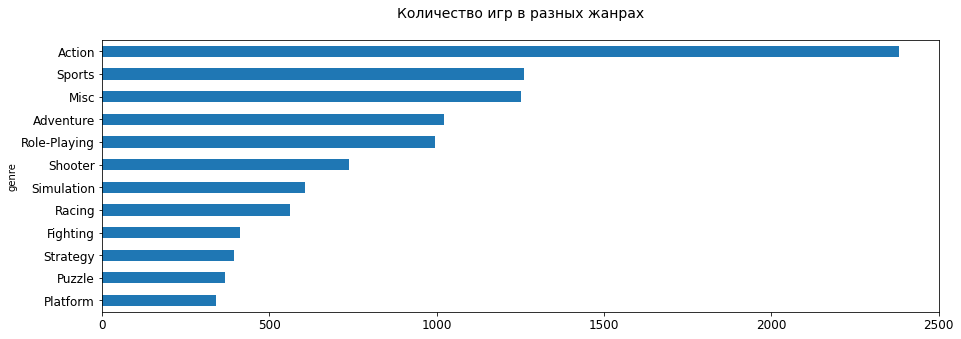

In [35]:
# Посмотрим как рапределены игры по жанрам
(
    actual_data
    .groupby('genre')
    .agg({'name': 'count'})
    .sort_values(by='name')
    .plot(kind='barh', figsize=(15,5), fontsize=12, legend=False)
    .set_title('Количество игр в разных жанрах' + '\n', fontsize=14)
);

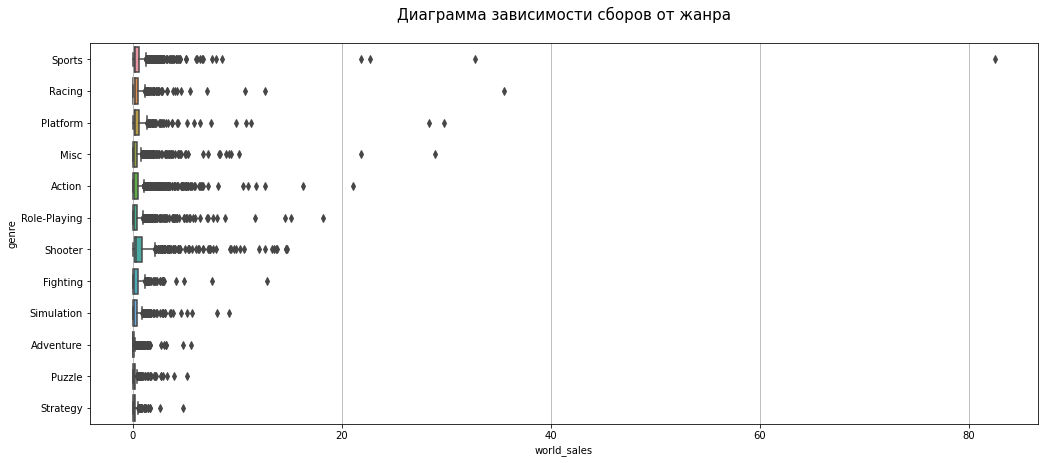

In [36]:
# Посмотрим как распределена общая прибыль в зависимости от жанра игры
fig, ax = plt.subplots(figsize=(17, 7))
ax.grid()
ax.set_title('Диаграмма зависимости сборов от жанра' + '\n', fontsize = 15)
sns.boxplot(data=actual_data, x='world_sales', y='genre');
plt.show()

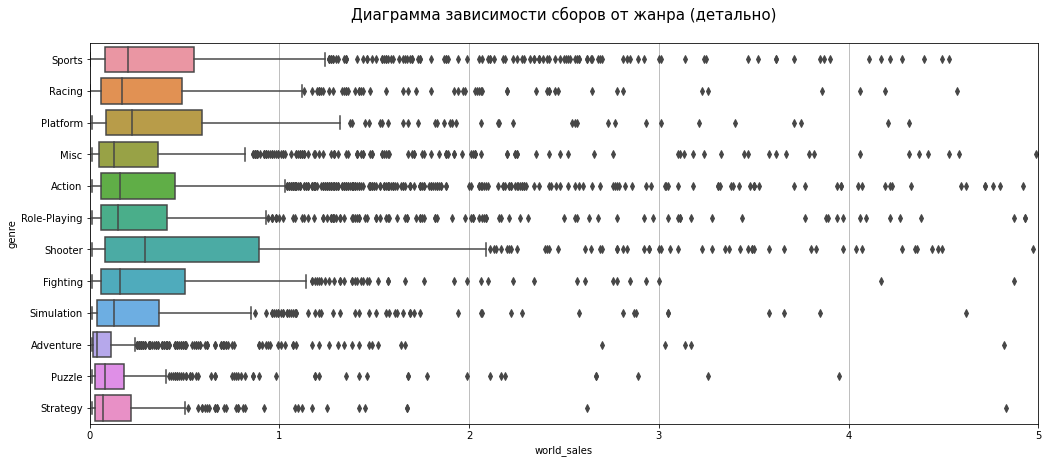

In [37]:
# Посмотрим как распределена общая прибыль в зависимости от жанра игры
fig, ax = plt.subplots(figsize=(17, 7))
ax.grid()
ax.set_title('Диаграмма зависимости сборов от жанра (детально)' + '\n', fontsize = 15)
ax.set_xlim(0, 5)
sns.boxplot(data=actual_data, x='world_sales', y='genre');
plt.show()

Из таблиц видно, что самым распространенным жанром в мире игр является экшен. Однако по сборам такие игры достаточно средние. Меньше всего выпускают платформенных игр. Интересно заметить, что хоть игр в данном жанре не очень много, но они имеют хорошие показатели по сборам.

Самые большие сборы у игры в жанре спорт. В остальном самые лучшие показатели у шутеров (стрелялок) - самое высокое медианное значение, самая большая "коробка" и также самое высокое значение 75 квантиля. Хуже всего собирают игры в жанре приключений, хотя данный жанр входит в топ-5 популярных жанров.

**Вывод**

Проведя исследовательский анализ, мы узнали среднюю продолжительность жизни платформ (5-10 лет) и отобрали актуальные для прогназирования данные.

По актуальным данным были сделаны следующие выводы:

- выбрали несколько потенциальных (PS4, XOne) и стабильных (WiiU, PC, PSV) платформ


- выяснили, что сборы по играм напрямую не зависят от отзывов ни пользователей, ни критиков


- рассмотрели зависимость сборов от жанрорв игр:
  - выяснили, что в среднем самые высокие сборы у игр в жанре шутеры
  - обнаружили, что платформенных игр выпсукают очень мало, но тем не менее они в среднем получают высокие сборы
  - обнаружили, что игр в жанре приключения выпсукают много, но тем не менее они в среднем получают самые маленькие сборы

## Как меняются предпочтения в разных регионах

Теперь посмотрим как меняются предпочтения в зависимости от региона.

### Топ-5 платформ

In [38]:
# Создадим функцию, которая будет выводить топ-5 платформ по продажам в указанном регионе,
# а не вошедшие в топ запишет как "другие"
def top_5_platforms(place_sales):
    platforms = (
        actual_data
        .pivot_table(index='platform', values=place_sales, aggfunc='sum')
        .sort_values(by=place_sales, ascending=False)
    )
    others = platforms.iloc[5:][place_sales].sum()
    new_row = pd.Series(data={place_sales: others}, name='Other')
    platforms = platforms.append(new_row, ignore_index=False)
    platforms = platforms.sort_values(by=place_sales, ascending=False).head(6)
    return platforms

In [39]:
na_platforms = top_5_platforms('na_sales')
na_platforms

C:\Users\USER\AppData\Local\Temp\ipykernel_1432\3668766930.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  platforms = platforms.append(new_row, ignore_index=False)


,na_sales
platform,
X360,588.84
Wii,486.87
Other,481.95
PS3,390.13
DS,323.99
PS2,114.89


In [40]:
eu_platforms = top_5_platforms('eu_sales')
eu_platforms

C:\Users\USER\AppData\Local\Temp\ipykernel_1432\3668766930.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  platforms = platforms.append(new_row, ignore_index=False)


,eu_sales
platform,
Other,358.50
PS3,327.21
X360,267.89
Wii,258.32
DS,142.99
PS4,141.09


In [41]:
jp_platforms = top_5_platforms('jp_sales')
jp_platforms

C:\Users\USER\AppData\Local\Temp\ipykernel_1432\3668766930.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  platforms = platforms.append(new_row, ignore_index=False)


,jp_sales
platform,
DS,141.49
Other,100.88
3DS,100.62
PS3,79.41
PSP,70.63
Wii,68.28


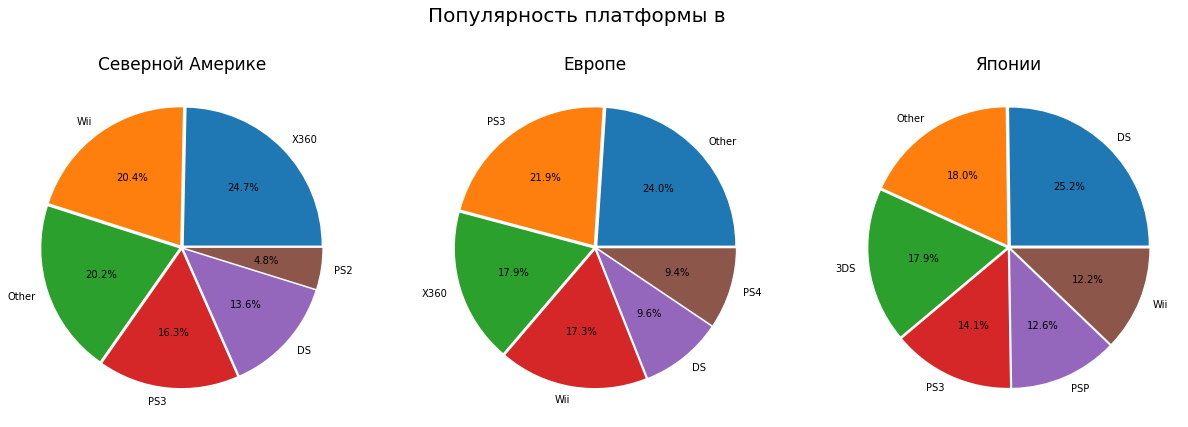

In [42]:
fig = plt.figure(figsize=(21,7))
axs0 = fig.add_subplot(1,3,1)
axs1 = fig.add_subplot(1,3,2)
axs2 = fig.add_subplot(1,3,3)

axs0.set_title('Северной Америке').set_size(17)
axs1.set_title('Европе').set_size(17)
axs2.set_title('Японии').set_size(17)

axs0.pie(x=na_platforms['na_sales'], labels=na_platforms.index, autopct='%1.1f%%', explode=[0.02] * 6)
axs1.pie(x=eu_platforms['eu_sales'], labels=eu_platforms.index, autopct='%1.1f%%', explode=[0.02] * 6)
axs2.pie(x=jp_platforms['jp_sales'], labels=jp_platforms.index, autopct='%1.1f%%', explode=[0.02] * 6)

fig.suptitle('Популярность платформы в', fontsize=20);

Как видно из приведенных диаграмм, в разных регионах популярны в основном одни и те же платформы, однако в каждом регионе есть какая-то особенность. Так, например, в Свеверной Америке самые большие сборы у Xbox, что неудивительно, ведь платформа создана компанией из США. В Японии же все топ-5 заняли платформы, созданные в Японии.

Интересно заметить, что только набирающая популярность платформа PS4 успела войти в топ-5 у Европы.

### Топ-5 жанров

In [43]:
# Создадим функцию, которая будет выводить топ-5 жанров по продажам в указанном регионе,
# а не вошедшие в топ запишет как "другие"
def top_5_genres(place_sales):
    platforms = (
        actual_data
        .pivot_table(index='genre', values=place_sales, aggfunc='sum')
        .sort_values(by=place_sales, ascending=False)
    )
    others = platforms.iloc[5:][place_sales].sum()
    new_row = pd.Series(data={place_sales: others}, name='Other')
    platforms = platforms.append(new_row, ignore_index=False)
    platforms = platforms.sort_values(by=place_sales, ascending=False).head(6)
    return platforms

In [44]:
na_genres = top_5_genres('na_sales')
na_genres

C:\Users\USER\AppData\Local\Temp\ipykernel_1432\2186772912.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  platforms = platforms.append(new_row, ignore_index=False)


,na_sales
genre,
Other,601.77
Action,530.44
Sports,396.64
Shooter,373.13
Misc,285.06
Role-Playing,199.63


In [45]:
eu_genres = top_5_genres('eu_sales')
eu_genres

C:\Users\USER\AppData\Local\Temp\ipykernel_1432\2186772912.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  platforms = platforms.append(new_row, ignore_index=False)


,eu_sales
genre,
Other,394.59
Action,350.70
Sports,251.55
Shooter,238.89
Misc,146.88
Racing,113.39


In [46]:
jp_genres = top_5_genres('jp_sales')
jp_genres

C:\Users\USER\AppData\Local\Temp\ipykernel_1432\2186772912.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  platforms = platforms.append(new_row, ignore_index=False)


,jp_sales
genre,
Role-Playing,170.38
Other,140.16
Action,102.07
Misc,64.53
Sports,48.97
Platform,35.20


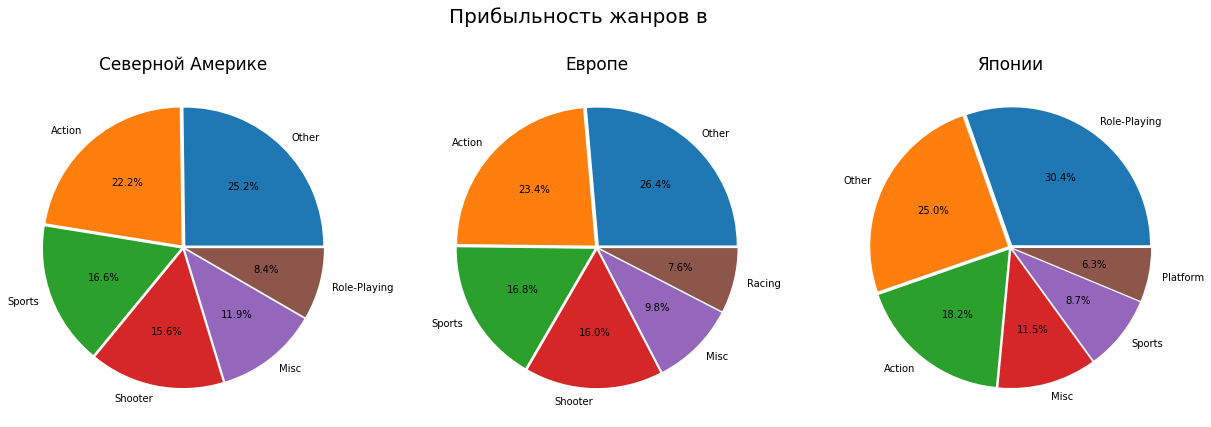

In [47]:
fig = plt.figure(figsize=(21,7))
axs0 = fig.add_subplot(1,3,1)
axs1 = fig.add_subplot(1,3,2)
axs2 = fig.add_subplot(1,3,3)

axs0.set_title('Северной Америке').set_size(17)
axs1.set_title('Европе').set_size(17)
axs2.set_title('Японии').set_size(17)

axs0.pie(x=na_genres['na_sales'], labels=na_genres.index, autopct='%1.1f%%', explode=[0.02] * 6)
axs1.pie(x=eu_genres['eu_sales'], labels=eu_genres.index, autopct='%1.1f%%', explode=[0.02] * 6)
axs2.pie(x=jp_genres['jp_sales'], labels=jp_genres.index, autopct='%1.1f%%', explode=[0.02] * 6)

fig.suptitle('Прибыльность жанров в', fontsize=20);

Здесь ситуация отличается от предыдущей. На лицо "западная" и "восточная" культура.

В Северной Америке и Европе топ-5 почти идентичны, ралзичаются лишь в долях и последнем жанре. На первом месте в обоих регионах находятся игры жанра экшен, которые, как мы знаем, самые распространенные в магазине "Стримчик".

В Японии же самым популярным жанром являются ролевые игры. Также только тут в топ вошли платформенные игры, которых, как мы знаем, очень мало в магазие, но приносят они достаточно большие мировые сборы.

Также интересно отметить, что мировые сборы по шутерам в среднем выше, однако в Европе и Северной Америке на 3 месте, а в Японии вовсе не вошли в топ. Скорее всего это означает, что они много собирают в "остальных" регионах.

### Влияние возрастного рейтинга на продажи

In [48]:
na_rating = (
        actual_data
        .pivot_table(index='rating', values='na_sales', aggfunc='sum')
        .sort_values(by='na_sales', ascending=False)
    )
na_rating

,na_sales
rating,
E,796.98
M,574.33
T,424.14
E10+,315.40
RP,274.50
EC,1.32


In [49]:
eu_rating = (
        actual_data
        .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
        .sort_values(by='eu_sales', ascending=False)
    )
eu_rating

,eu_sales
rating,
E,461.09
M,398.90
T,235.44
RP,227.22
E10+,173.35
EC,0.00


In [50]:
jp_rating = (
        actual_data
        .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
        .sort_values(by='jp_sales', ascending=False)
    )
jp_rating

,jp_sales
rating,
RP,276.69
E,120.36
T,83.90
M,43.79
E10+,36.57
EC,0.00


In [51]:
world_rating = (
        actual_data
        .pivot_table(index='rating', values='world_sales', aggfunc='sum')
        .sort_values(by='world_sales', ascending=False)
    )
world_rating

,world_sales
rating,
E,1540.97
M,1157.72
RP,854.77
T,849.33
E10+,592.83
EC,1.40


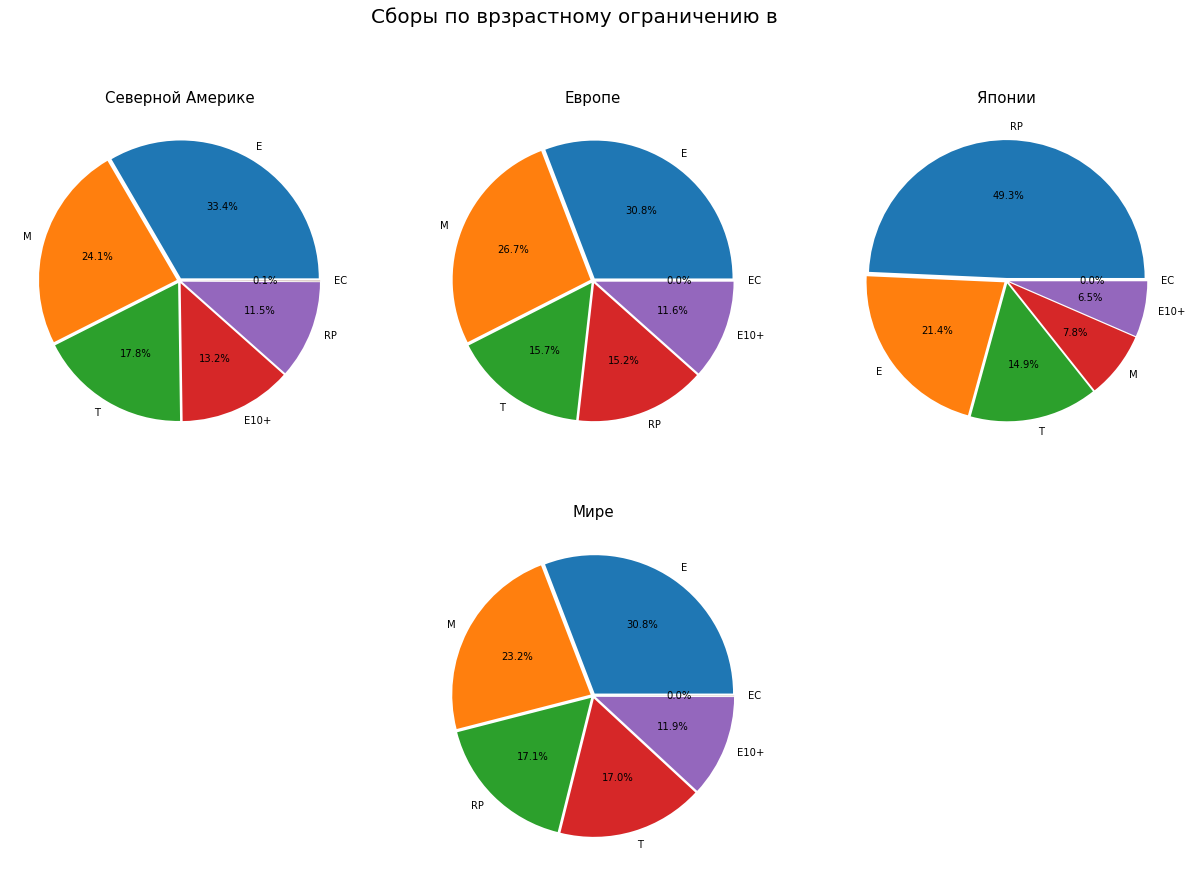

In [52]:
fig = plt.figure(figsize=(21,14))
axs0 = fig.add_subplot(2,3,1)
axs1 = fig.add_subplot(2,3,2)
axs2 = fig.add_subplot(2,3,3)
axs3 = fig.add_subplot(2,1,2)

axs0.set_title('Северной Америке').set_size(15)
axs1.set_title('Европе').set_size(15)
axs2.set_title('Японии').set_size(15)
axs3.set_title('Мире').set_size(15)

axs0.pie(x=na_rating['na_sales'], labels=na_rating.index, autopct='%1.1f%%', explode=[0.02] * 6)
axs1.pie(x=eu_rating['eu_sales'], labels=eu_rating.index, autopct='%1.1f%%', explode=[0.02] * 6)
axs2.pie(x=jp_rating['jp_sales'], labels=jp_rating.index, autopct='%1.1f%%', explode=[0.02] * 6)
axs3.pie(x=world_rating['world_sales'], labels=world_rating.index, autopct='%1.1f%%', explode=[0.02] * 6)

fig.suptitle('Сборы по врзрастному ограничению в', fontsize=20);

При распределении продаж по возрастному ограничению игр первым делом снова бросается в глаза различия между востоком и западом. В Японии почти половина продаж приходит с игр, чей рейтинг еще не был определен, а на западе они составляют лишь 11%.

Если не учитывать игры без рейтинга, тогда видна всеобщая популярность игр для "для всех" и низкий доход с игр для детей.
Игры для взрослых более прибыльны на западе, причем настолько, что стоят на втором месте по прибыли как Европе и Северной Америке, так и в мире.

Игры для маленьких детей свою основную прибыль получают в Америке. На уровне мира доход от таких игр нулевой.

**Выводы**

Рассмотрев продажи в разных регионах мира, получили следующие результаты:

- популярные платформы немного зависят от региона (например, в Японии в топе присутсвуют только японские платформы)


- популярные жанры зависят от культурной принадлежности


- зависимость от возрастного рейтинга присутсвует:
   - на западе игры для взрослых составляют почти четверть от общего дохода, в Японии же продажи составляют < 10%
   - на востоке половина продаж приходит с игр, чей рейтинг еще не был определен

## Проверка гипотиз

In [53]:
alpha = 0.05

Для проверки следующих гипотез будем использовать t-критерий Стьюдента о равенстве средних двух независмых выборок.

### Первая гипотеза

Нужно проверить гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Сформулируем нулевую гипотезу.

$H_0:$ средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [54]:
sample1 = list(actual_data.query('platform == "XOne" and not(user_score.isna())')['user_score'])
sample2 = list(actual_data.query('platform == "PC" and not(user_score.isna())')['user_score'])

In [55]:
len(sample1) == len(sample2)

False

In [56]:
stat, p = st.ttest_ind(sample1, sample2, equal_var = False)
p

0.01014021353497224

In [57]:
if p < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


Мы отвергаем нулевую гипотезу и принимаем альтернативную: средние пользовательские рейтинги платформ Xbox One и PC разные.

### Вторая гипотеза

Нужно проверить гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные. Сформулируем нулевую гипотезу.

$H_0:$ средние пользовательские рейтинги жанров Action и Sports одинаковые.

In [58]:
sample1 = list(actual_data.query('genre == "Action" and not(user_score.isna())')['user_score'])
sample2 = list(actual_data.query('genre == "Sports" and not(user_score.isna())')['user_score'])

In [59]:
len(sample1) == len(sample2)

False

In [60]:
stat, p = st.ttest_ind(sample1, sample2, equal_var = False)
p

5.319061853268226e-10

In [61]:
if p < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


Гипотеза, которую нужно было проверить оказалась верной. Отвергнув равенство средних оценок, мы принимаем альтернативную об их неравенстве.

## Выводы

В процессе предобработки данных были обнаружены пропуски, аномалии и расхождения с общепринятым стилем. Данные были сккоректированы с минимальными потерями. Однако в важных для исследования данных осталось много пропусков, из-за чего могла нарушиться точность результатов.

В ходе исследовательского анализа мы узнали среднюю продолжительность жизни платформ (5-10 лет) и отобрали актуальные для прогназирования данные.

По актуальным данным:

- выявили несколько потенциальных (PS4, XOne) и стабильных (WiiU, PC, PSV) платформ


- выяснили, что мировые сборы по играм напрямую не зависят от отзывов ни пользователей, ни критиков


- рассмотрели зависимость сборов от жанрорв игр:
  - выяснили, что в среднем самые высокие сборы у игр в жанре шутеры
  - обнаружили, что платформенных игр выпсукают очень мало, но тем не менее они в среднем получают высокие сборы
  - обнаружили, что игр в жанре приключения выпсукают много, но тем не менее они в среднем получают самые маленькие сборы
  
  
- рассмотрели продажи в разных регионах мира и получили следующие результаты:

  - популярные платформы немного зависят от региона (например, в Японии в топе присутсвуют только японские платформы)
  - популярные жанры зависят от культурной принадлежности
  - зависимость от возрастного рейтинга присутсвует:
    - на западе игры для взрослых составляют почти четверть от общего дохода, в Японии же продажи составляют < 10%
    - на востоке половина продаж приходит с игр, чей рейтинг еще не был определен


- были проверены две гипотезы и выявлено, что:
  - средние пользовательские рейтинги платформ Xbox One и PC разные
  - средние пользовательские рейтинги жанров Action и Sports разные
  
Подводя итоги, можно сказать, что для успешной рекламной компании в 2017 г нужно отдать предпочтение таким платформам как PS4 и XOne, играм общего возрастного рейтинга (Е) в жанрах экшен, ролевые, шутеры и платферменные.